In [5]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib as plt
import matplotlib.pyplot as plt

dataset=load_dataset('Lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df['job_posted_date'] =pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

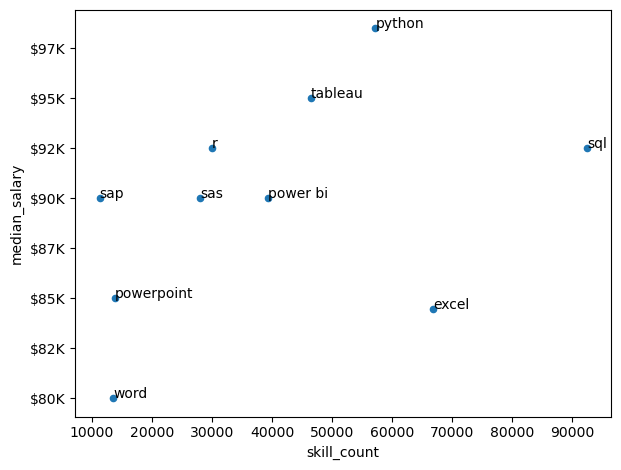

In [9]:
#fig,ax=plt.subplots()
df=df[df['job_title_short'] == 'Data Analyst']
df_exploded=df.explode('job_skills')
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

skill_stats = skill_stats.sort_values(by='skill_count',ascending=False).head(10)
skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.tight_layout()
for i,text in enumerate(skill_stats.index):    ##skill_stats.index becuz left most column is our index(enumerate making list)
    plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],text)
skill_stats

ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))